# Ejercicio Dataset Vinos

Con el dataset de vinos:
- Observar el comportamiento y distribución de los datos apoyándose de técnicas vistas durante el curso.
- Aplicar PCA para visualizar la distribución de los datos.
- Aplicar un modelo de clustering K-means y visualizar en una gráfica los resultados de la distribución de los clusters.

## Inicializamos librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
from tqdm import tqdm
import seaborn as sns
import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


## Cargamos los datos

In [2]:
df = pd.read_csv('vino.csv')

In [3]:
df.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45     1480  
4   2.93      735

## Observar el comportamiento y distribución de los datos apoyándose de técnicas vistas durante el curso.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [5]:
df.describe()

Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count  178.000000  178.000000  178.000000    178.000000  178.000000   
mean    13.000618    2.336348    2.366517     19.494944   99.741573   
std      0.811827    1.117146    0.274344      3.339564   14.282484   
min     11.030000    0.740000    1.360000     10.600000   70.000000   
25%     12.362500    1.602500    2.210000     17.200000   88.000000   
50%     13.050000    1.865000    2.360000     19.500000   98.000000   
75%     13.677500    3.082500    2.557500     21.500000  107.000000   
max     14.830000    5.800000    3.230000     30.000000  162.000000   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       Color_Intensity         Hue       OD280      Proline  
count       178.000000  178.000000  178.000000   178.000000  
mean          5.058090    0.957449    2.611685   746.893258  
std           2.318286    0.228572    0.709990   314.907474  
min           1.280000    0.480000    1.270000   278.000000  
25%           3.220000    0.782500    1.937500   500.500000  
50%           4.690000    0.965000    2.780000   673.500000  
75%           6.200000    1.120000    3.170000   985.000000  
max          13.000000    1.710000    4.000000  1680.000000

In [6]:
scaler=StandardScaler()

df_norm = df.copy()
df_norm[df_norm.columns] = scaler.fit_transform(df[df.columns])


In [7]:
df_norm.head()

Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0  1.518613   -0.562250  0.232053     -1.169593   1.913905       0.808997   
1  0.246290   -0.499413 -0.827996     -2.490847   0.018145       0.568648   
2  0.196879    0.021231  1.109334     -0.268738   0.088358       0.808997   
3  1.691550   -0.346811  0.487926     -0.809251   0.930918       2.491446   
4  0.295700    0.227694  1.840403      0.451946   1.281985       0.808997   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
0    1.034819             -0.659563         1.224884         0.251717   
1    0.733629             -0.820719        -0.544721        -0.293321   
2    1.215533             -0.498407         2.135968         0.269020   
3    1.466525             -0.981875         1.032155         1.186068   
4    0.663351              0.226796         0.401404        -0.319276   

        Hue     OD280   Proline  
0  0.362177  1.847920  1.013009  
1  0.406051  1.113449  0.965242  
2  0.318304  0.788587  1.395148  
3 -0.427544  1.184071  2.334574  
4  0.362177  0.449601 -0.037874

In [8]:
df_norm.describe().round(2)

Alcohol  Malic_Acid     Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
count   178.00      178.00  178.00        178.00     178.00         178.00   
mean     -0.00       -0.00   -0.00         -0.00      -0.00           0.00   
std       1.00        1.00    1.00          1.00       1.00           1.00   
min      -2.43       -1.43   -3.68         -2.67      -2.09          -2.11   
25%      -0.79       -0.66   -0.57         -0.69      -0.82          -0.89   
50%       0.06       -0.42   -0.02          0.00      -0.12           0.10   
75%       0.84        0.67    0.70          0.60       0.51           0.81   
max       2.26        3.11    3.16          3.15       4.37           2.54   

       Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
count      178.00                178.00           178.00           178.00   
mean        -0.00                  0.00            -0.00             0.00   
std          1.00                  1.00             1.00             1.00   
min         -1.70                 -1.87            -2.07            -1.63   
25%         -0.83                 -0.74            -0.60            -0.80   
50%          0.11                 -0.18            -0.06            -0.16   
75%          0.85                  0.61             0.63             0.49   
max          3.06                  2.40             3.49             3.44   

          Hue   OD280  Proline  
count  178.00  178.00   178.00  
mean     0.00    0.00    -0.00  
std      1.00    1.00     1.00  
min     -2.09   -1.90    -1.49  
25%     -0.77   -0.95    -0.78  
50%      0.03    0.24    -0.23  
75%      0.71    0.79     0.76  
max      3.30    1.96     2.97

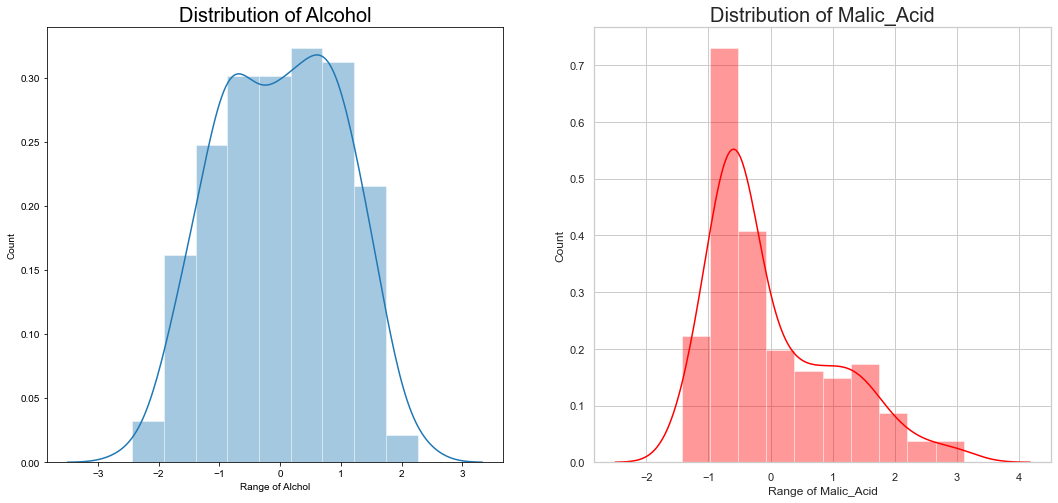

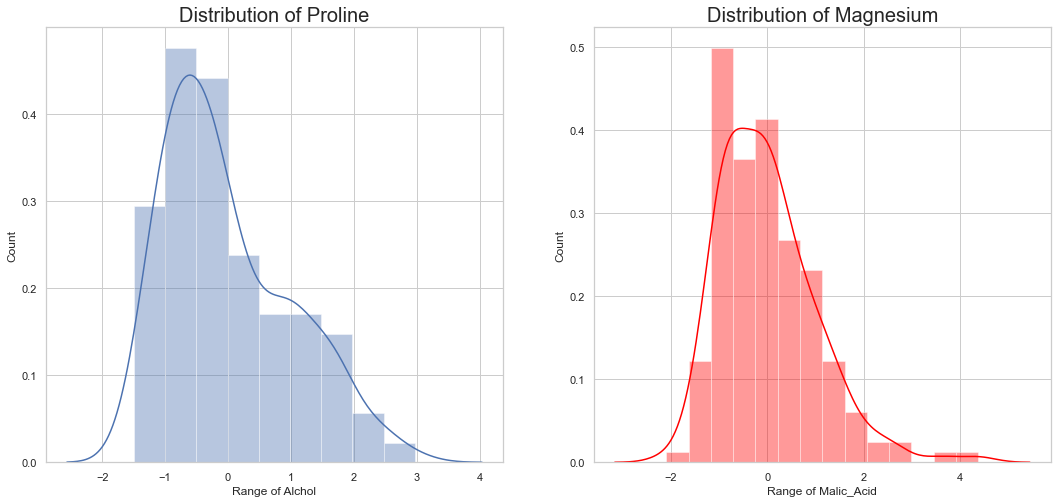

In [9]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(df_norm['Alcohol'])
plt.title('Distribution of Alcohol', fontsize = 20)
plt.xlabel('Range of Alchol')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(df_norm['Malic_Acid'], color = 'red')
plt.title('Distribution of Malic_Acid', fontsize = 20)
plt.xlabel('Range of Malic_Acid')
plt.ylabel('Count')
plt.show()

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(df_norm['Proline'])
plt.title('Distribution of Proline', fontsize = 20)
plt.xlabel('Range of Alchol')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(df_norm['Magnesium'], color = 'red')
plt.title('Distribution of Magnesium', fontsize = 20)
plt.xlabel('Range of Malic_Acid')
plt.ylabel('Count')
plt.show()

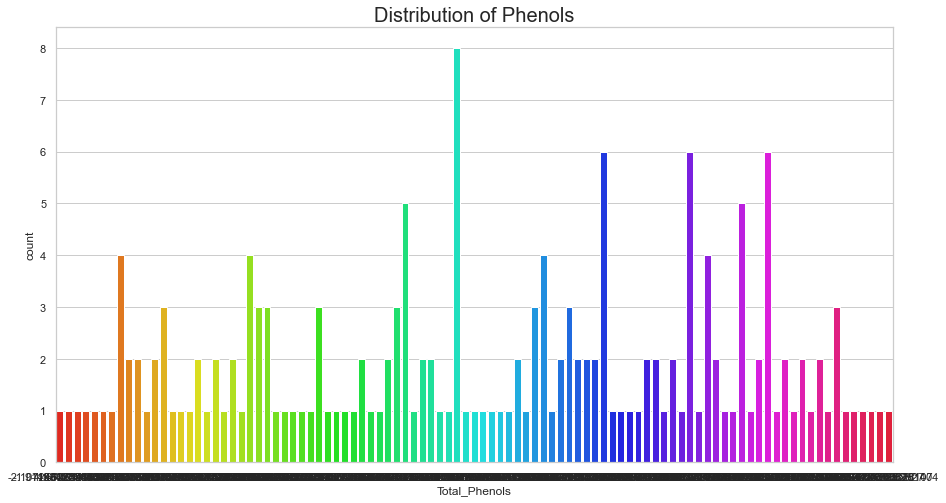

In [10]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(df_norm['Total_Phenols'], palette = 'hsv')
plt.title('Distribution of Phenols', fontsize = 20)
plt.show()

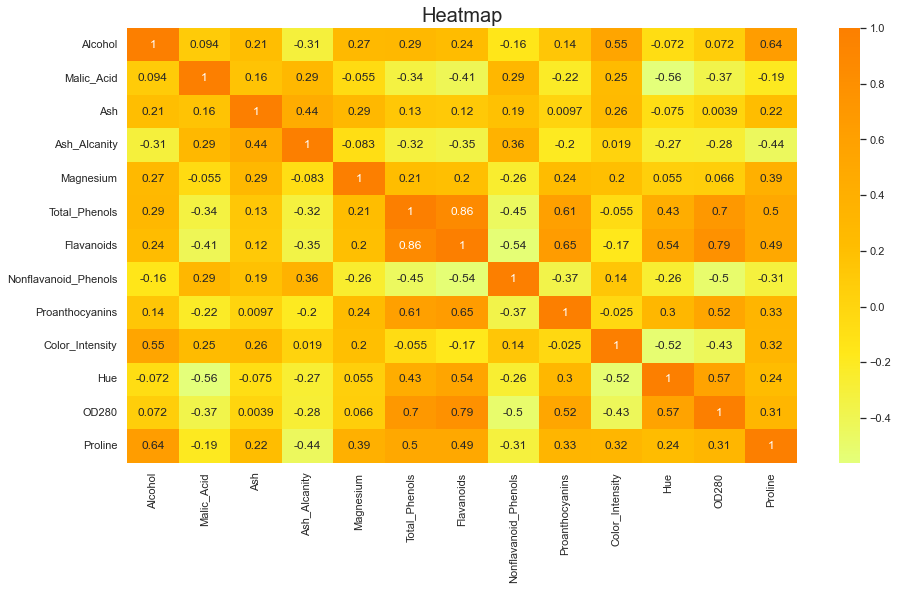

In [11]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(df_norm.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap', fontsize = 20)
plt.show()

## Aplicar PCA para visualizar la distribución de los datos.

In [12]:
pca = PCA(n_components = 3, random_state = 42)
pca_3 = pca.fit_transform(df_norm)

In [13]:
df_pca = pd.DataFrame({"pc1":pca_3[:,0], "pc2":pca_3[:,1], "pc3":pca_3[:,2]})

In [14]:
df_pca.head()

pc1       pc2       pc3
0  3.316751 -1.443463 -0.165739
1  2.209465  0.333393 -2.026457
2  2.516740 -1.031151  0.982819
3  3.757066 -2.756372 -0.176192
4  1.008908 -0.869831  2.026688

#### Vamos a ver el ratio de la varianza explicada para cada una de las dos variables

In [15]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631])

In [16]:
pca.explained_variance_ratio_.sum()

0.6652996889318525

<BarContainer object of 3 artists>

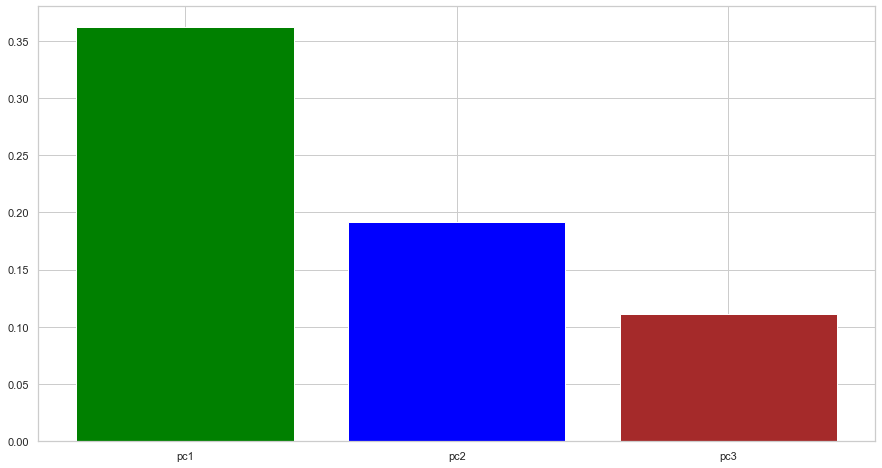

In [17]:
plt.bar(["pc1", "pc2", "pc3"], pca.explained_variance_ratio_, color = ["green", "blue", "brown"])

In [39]:
lista_total = []
for pc in df_pca.columns:
    lista = []
    for originals in df_norm.columns:
        temp = df_pca[pc].corr(df_norm[originals])
        lista.append(temp)
    lista_total.append(lista)

In [43]:
matrix = pd.DataFrame(lista_total, columns = df_norm.columns, index = df_pca.columns)

In [46]:
matrix

Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
pc1  0.313093   -0.531885 -0.004449     -0.519157   0.308023       0.856137   
pc2 -0.764257   -0.355432 -0.499446      0.016735  -0.473476      -0.102774   
pc3 -0.249383    0.107040  0.753051      0.736043   0.157239       0.175784   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
pc1    0.917470             -0.647607         0.679922        -0.192236   
pc2    0.005309             -0.045477        -0.062104        -0.837489   
pc3    0.181199              0.204872         0.179723        -0.165114   

          Hue     OD280   Proline  
pc1  0.643662  0.816019  0.622051  
pc2  0.441242  0.259934 -0.576613  
pc3  0.102482  0.199625 -0.152415

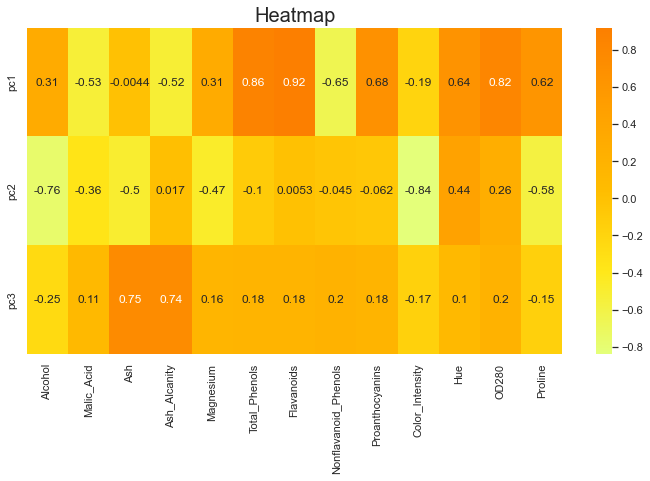

In [45]:
plt.rcParams['figure.figsize'] = (12, 6)
sns.heatmap(matrix, cmap = 'Wistia', annot = True)
plt.title('Heatmap', fontsize = 20)
plt.show()

#### A continucación, visualizamos nuestras componentes.

Text(0.5, 0, '3er autovector pc2')

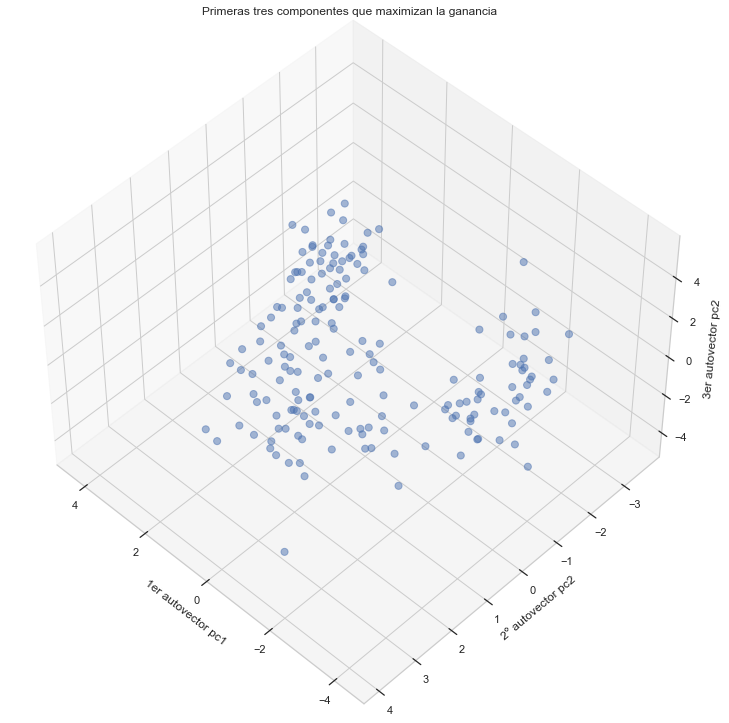

In [72]:
fig = plt.figure(figsize = (10,10))
plt.axis("on")
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()
scatter = ax.scatter3D(df_pca["pc1"], df_pca["pc2"], df_pca["pc3"], marker = "o", s = 50, alpha = 0.5, cmap = "viridis")
#plt.legend(handles=scatter.legend_elements()[0], labels=df_pca.target_cat.unique().tolist())
ax.set_title("Primeras tres componentes que maximizan la ganancia")
ax.set_xlabel("1er autovector pc1")
ax.set_ylabel("2º autovector pc2")
ax.set_zlabel("3er autovector pc2")

## Aplicar un modelo de clustering K-means y visualizar en una gráfica los resultados de la distribución de los clusters.

In [73]:
num_clusters = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in num_clusters] 
kmeans

[KMeans(n_clusters=1),
 KMeans(n_clusters=2),
 KMeans(n_clusters=3),
 KMeans(n_clusters=4),
 KMeans(n_clusters=5),
 KMeans(n_clusters=6),
 KMeans(n_clusters=7),
 KMeans(),
 KMeans(n_clusters=9),
 KMeans(n_clusters=10),
 KMeans(n_clusters=11),
 KMeans(n_clusters=12),
 KMeans(n_clusters=13),
 KMeans(n_clusters=14),
 KMeans(n_clusters=15),
 KMeans(n_clusters=16),
 KMeans(n_clusters=17),
 KMeans(n_clusters=18),
 KMeans(n_clusters=19)]

In [74]:
score = [abs(kmeans[i].fit(df_norm).score(df_norm)) for i in range(len(kmeans))] 
score

[2313.999999999999,
 1659.0079672511504,
 1277.928488844643,
 1183.5541576781238,
 1112.5961778865985,
 1054.8785549279069,
 984.677882654819,
 938.5896108387201,
 902.9867646363143,
 863.2224568521456,
 809.5370048915527,
 795.1059208968227,
 770.4204137215175,
 736.5288454787639,
 720.2609846952123,
 704.6268329432254,
 684.4858722069623,
 669.3004162255845,
 633.9260047386275]

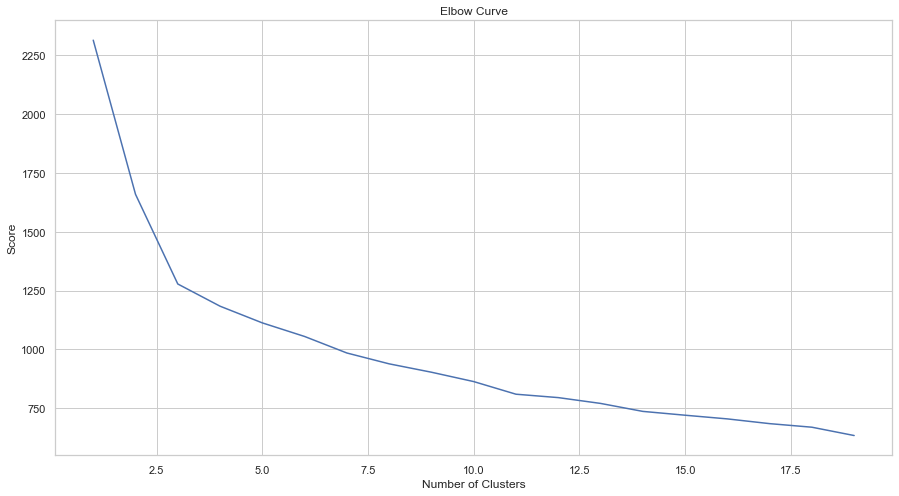

In [75]:
plt.plot(num_clusters,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [76]:
kmeans = KMeans(n_clusters=5).fit(df_norm)

In [77]:
centroids = kmeans.cluster_centers_

In [78]:
labels = kmeans.predict(df_norm)

Visualizamos con 3 de las variables del dataset

In [81]:
df_norm["labels"] = labels
df_norm.sort_values("labels", inplace = True)

Text(0.5, 0, 'Color_Intensity')

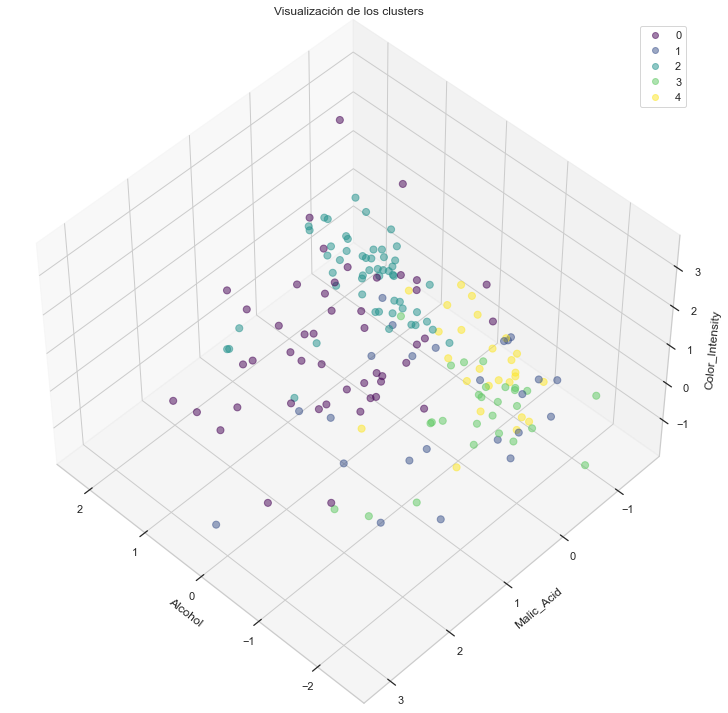

In [82]:
fig = plt.figure(figsize = (10,10))
plt.axis("on")
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()
scatter = ax.scatter3D(df_norm["Alcohol"], df_norm["Malic_Acid"], df_norm["Color_Intensity"], marker = "o", s = 50, c = df_norm["labels"].tolist(), alpha = 0.5, cmap = "viridis")
plt.legend(handles=scatter.legend_elements()[0], labels=df_norm.labels.unique().tolist())
ax.set_title("Visualización de los clusters")
ax.set_xlabel("Alcohol")
ax.set_ylabel("Malic_Acid")
ax.set_zlabel("Color_Intensity")

Vamos ahora a visualizar utilizando PCA

In [84]:
df_pca["labels"] = labels
df_pca.sort_values("labels", inplace = True)

Text(0.5, 0, '3er autovector pc2')

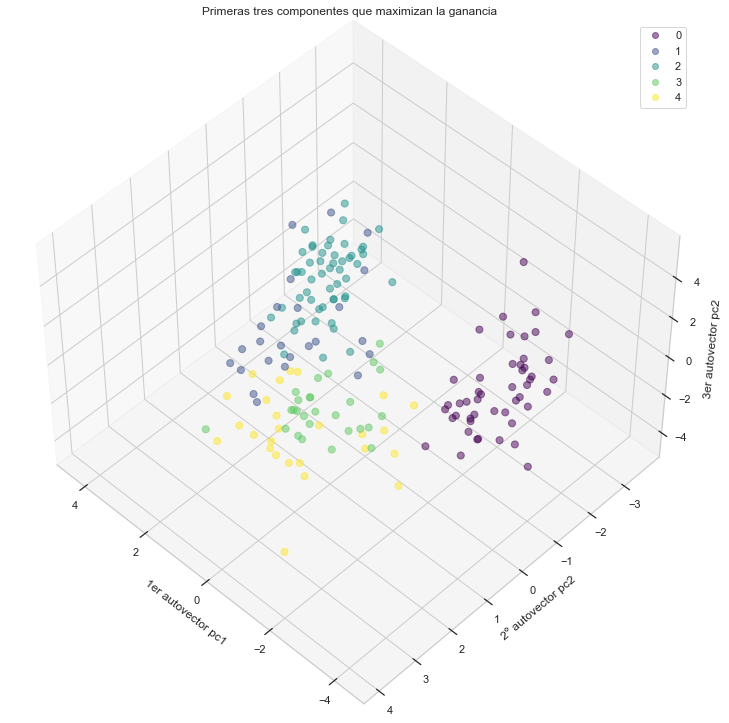

In [85]:
fig = plt.figure(figsize = (10,10))
plt.axis("on")
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()
scatter = ax.scatter3D(df_pca["pc1"], df_pca["pc2"], df_pca["pc3"], marker = "o", s = 50, c = df_pca["labels"].tolist(), alpha = 0.5, cmap = "viridis")
plt.legend(handles=scatter.legend_elements()[0], labels=df_pca.labels.unique().tolist())
ax.set_title("Primeras tres componentes que maximizan la ganancia")
ax.set_xlabel("1er autovector pc1")
ax.set_ylabel("2º autovector pc2")
ax.set_zlabel("3er autovector pc2")

In [86]:
fig = plt.figure(figsize = (15,15))
fig = px.scatter_3d(x = df_pca["pc1"],y = df_pca["pc2"], z = df_pca["pc3"], color=df_pca["labels"])
fig.update_layout(title='Primeras tres componentes que maximizan la ganancia', autosize=False,
#                  x_label = "1er autovector pc1",
#                  ylabel = "2º autovector pc1",
#                  zlabel = "3er autovector pc1",
                  width=800, height=800,
                  showlegend= True,
                  margin=dict(l=65, r=50, b=65, t=90))

<Figure size 1080x1080 with 0 Axes>